In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4549dc11-a1f2-4cd3-852c-099502521c08',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:

import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)



In [4]:
#Prettifies data and makes it look good in a dataframe
df=pd.json_normalize(data['data'])
#creates a new column named timestamp to store the current date time stamp
df['timestamp']=pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937186e+07,1.937186e+07,False,NaN,1,NaN,NaN,None,2023-05-13T07:22:00.000Z,26769.717075,1.635171e+10,-14.3905,0.050237,1.774218,-8.996741,-10.996177,9.237453,22.686601,5.185793e+11,46.2668,5.621641e+11,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
1,1027,Ethereum,ETH,ethereum,6867,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.228416e+08,1.228416e+08,True,NaN,2,NaN,NaN,None,2023-05-13T07:22:00.000Z,1801.840146,7.535225e+09,-20.6659,0.146881,2.477869,-8.356087,-6.008587,7.039733,17.537714,2.213409e+11,19.7477,2.213409e+11,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
2,825,Tether,USDT,tether,53297,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.279724e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-13T07:22:00.000Z,1.000532,2.461642e+10,-16.0815,-0.008030,0.011907,-0.051219,-0.028778,-0.493125,0.029715,8.284127e+10,7.3892,8.613642e+10,None,2023-05-13T07:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-13 07:23:44.856740+00:00
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558601e+08,1.558601e+08,False,NaN,4,NaN,NaN,None,2023-05-13T07:22:00.000Z,310.001882,4.582340e+08,-12.4001,0.016132,2.183326,-4.758744,-2.719668,0.629424,0.969730,4.831693e+10,4.3097,4.831693e+10,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
4,3408,USD Coin,USDC,usd-coin,12382,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.997489e+10,2.997489e+10,False,NaN,5,NaN,NaN,None,2023-05-13T07:22:00.000Z,1.000076,3.454036e+09,-20.6153,0.003237,0.015415,0.007932,0.016527,0.065156,0.004809,2.997717e+10,2.6743,2.997717e+10,None,2023-05-13T07:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-13 07:23:44.856740+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.427009,7.790456e+08,-35.3204,0.116853,-0.186515,-7.969505,-15.722423,14.894553,11.687802,2.213521e+10,1.9744,4.270088e+10,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.484330e+10,3.577770e+10,False,NaN,7,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.367362,2.246038e+08,-16.5664,0.112229,1.755874,-5.814949,-9.484051,6.414024,0.196969,1.280012e+10,1.1417,1.653131e+10,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393247e+11,1.393247e+11,True,NaN,8,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.072029,3.006453e+08,-21.2530,0.142785,2.397588,-9.069172,-13.407623,-1.039240,-12.034019,1.003538e+10,0.8954,1.003538e+10,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:44.856740+00:00
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform

In [5]:
def api_runner():
        global df
        url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
        parameters = {
          'start':'1',
          'limit':'15',
          'convert':'USD'
        }
        headers = {
          'Accepts': 'application/json',
          'X-CMC_PRO_API_KEY': '4549dc11-a1f2-4cd3-852c-099502521c08',
        }

        session = Session()
        session.headers.update(headers)

        try:
          response = session.get(url, params=parameters)
          data = json.loads(response.text)
          #print(data)
        except (ConnectionError, Timeout, TooManyRedirects) as e:
          print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

            #Prettifies data and makes it look good in a dataframe
        df=pd.json_normalize(data['data'])
            #creates a new column named timestamp to store the current date time stamp
        df['timestamp']=pd.to_datetime('now',utc=True)
        #APPENDING TO A DATAFRAME
        #df_append = pd.DataFrame(df2)
        #df = pd.concat([df,df_append])
        #APPENDING TO A CSV FILE
        
        if not os.path.isfile(r'C:\Users\NKaur\OneDrive - Communications Test Design, Inc\Data Analyst Projects\Python Projects\API.csv'):
            df.to_csv(r'C:\Users\NKaur\OneDrive - Communications Test Design, Inc\Data Analyst Projects\Python Projects\API.csv',header='column_names')
        else: 
            df.to_csv(r'C:\Users\NKaur\OneDrive - Communications Test Design, Inc\Data Analyst Projects\Python Projects\API.csv',mode='a',header=False)
            

In [57]:
#automate the script
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [7]:
df72=pd.read_csv(r'C:\Users\NKaur\OneDrive - Communications Test Design, Inc\Data Analyst Projects\Python Projects\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.937079e+07,1.937079e+07,False,NaN,1,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,26615.045401,1.703144e+10,-18.2970,-0.771582,-3.132666,-8.885277,-11.159113,19.098158,22.654534,5.155544e+11,46.6810,5.589160e+11,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
1,1,1027,Ethereum,ETH,ethereum,6862,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203024e+08,1.203024e+08,False,NaN,2,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,1767.860320,8.517534e+09,-15.6652,-0.813381,-3.353920,-6.915405,-5.235831,10.717769,16.239294,2.126778e+11,19.2667,2.126778e+11,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
2,2,825,Tether,USDT,tether,53248,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.272651e+10,8.609064e+10,False,NaN,3,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,1.000413,2.664831e+10,-25.6240,-0.018069,-0.020431,-0.007659,-0.059547,-0.466400,0.023812,8.276067e+10,7.4936,8.612619e+10,NaN,2023-05-12T03:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-12 03:47:14.948274+00:00
3,3,1839,BNB,BNB,bnb,1354,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558604e+08,1.558604e+08,False,NaN,4,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,305.156301,4.877663e+08,-10.0463,-0.583944,-2.576664,-6.343107,-3.873402,5.731375,-0.941327,4.756178e+10,4.3087,4.756178e+10,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
4,4,3408,USD Coin,USDC,usd-coin,12369,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.998874e+10,2.998874e+10,False,NaN,5,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,0.999960,3.918805e+09,-13.0072,-0.012441,-0.004963,-0.007284,0.015899,0.531042,-0.010279,2.998752e+10,2.7166,2.998752e+10,NaN,2023-05-12T03:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-12 03:47:14.948274+00:00
5,5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,0.419322,9.028110e+08,-14.4494,-0.104518,-2.258163,-9.761809,-17.312230,13.493704,9.548613,2.173675e+10,1.9692,4.193223e+10,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
6,6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.484178e+10,3.577770e+10,False,NaN,7,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,0.357530,2.439766e+08,-27.9197,-0.180859,-2.194802,-8.662006,-8.452565,5.237591,-0.983506,1.245697e+10,1.1279,1.608884e+10,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
7,7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.393090e+11,1.393090e+11,False,NaN,8,NaN,NaN,NaN,2023-05-12T03:44:00.000Z,0.070775,3.358273e+08,-3.2941,-0.828234,-2.563326,-10.162451,-13.038532,0.484973,-13.853707,9.859639e+09,0.8932,9.859639e+09,NaN,2023-05-12T03:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 03:47:14.948274+00:00
8,8,5426,Solana,SOL,solana,459,2020-0

In [8]:
pd.set_option('display.float_format',lambda x:'% 5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19371862.000000,19371862.000000,False,NaN,1,NaN,NaN,None,2023-05-13T07:22:00.000Z,26769.717075,16351712302.717070,-14.390500,0.050237,1.774218,-8.996741,-10.996177,9.237453,22.686601,518579264961.432922,46.266800,562164058580.949951,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:54.448900+00:00
1,1027,Ethereum,ETH,ethereum,6867,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122841588.015919,122841588.015919,True,NaN,2,NaN,NaN,None,2023-05-13T07:22:00.000Z,1801.840146,7535225283.599185,-20.665900,0.146881,2.477869,-8.356087,-6.008587,7.039733,17.537714,221340904917.249664,19.747700,221340904917.250000,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:54.448900+00:00
2,825,Tether,USDT,tether,53297,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82797235449.067154,86090638895.071075,True,NaN,3,NaN,NaN,None,2023-05-13T07:22:00.000Z,1.000532,24616420974.838192,-16.081500,-0.008030,0.011907,-0.051219,-0.028778,-0.493125,0.029715,82841265774.495285,7.389200,86136420602.949997,None,2023-05-13T07:22:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-13 07:23:54.448900+00:00
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860122.433500,155860122.433500,False,NaN,4,NaN,NaN,None,2023-05-13T07:22:00.000Z,310.001882,458234038.099722,-12.400100,0.016132,2.183326,-4.758744,-2.719668,0.629424,0.969730,48316931265.659607,4.309700,48316931265.660004,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:54.448900+00:00
4,3408,USD Coin,USDC,usd-coin,12382,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29974894178.337185,29974894178.337185,False,NaN,5,NaN,NaN,None,2023-05-13T07:22:00.000Z,1.000076,3454035709.158934,-20.615300,0.003237,0.015415,0.007932,0.016527,0.065156,0.004809,29977167637.198364,2.674300,29977167637.200001,None,2023-05-13T07:22:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-13 07:23:54.448900+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,51837820505.000000,99988965239.000000,False,NaN,6,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.427009,779045615.900333,-35.320400,0.116853,-0.186515,-7.969505,-15.722423,14.894553,11.687802,22135206182.843510,1.974400,42700881262.379997,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:54.448900+00:00
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,34843302629.530998,35777697010.944000,False,NaN,7,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.367362,224603829.652902,-16.566400,0.112229,1.755874,-5.814949,-9.484051,6.414024,0.196969,12800121655.484615,1.141700,16531311070.629999,None,2023-05-13T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-13 07:23:54.448900+00:00
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139324686383.705200,139324686383.705292,True,NaN,8,NaN,NaN,None,2023-05-13T07:22:00.000Z,0.072029,3006453

In [ ]:
df3=df.groupby('name',sort=False)['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'].mean()
df3

In [11]:
#converting from columns to rows
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.050237
             quote.USD.percent_change_24h     1.774218
             quote.USD.percent_change_7d     -8.996741
             quote.USD.percent_change_30d   -10.996177
             quote.USD.percent_change_60d     9.237453
             quote.USD.percent_change_90d    22.686601
Ethereum     quote.USD.percent_change_1h      0.146881
             quote.USD.percent_change_24h     2.477869
             quote.USD.percent_change_7d     -8.356087
             quote.USD.percent_change_30d    -6.008587
             quote.USD.percent_change_60d     7.039733
             quote.USD.percent_change_90d    17.537714
Tether       quote.USD.percent_change_1h     -0.008030
             quote.USD.percent_change_24h     0.011907
             quote.USD.percent_change_7d     -0.051219
             quote.USD.percent_change_30d    -0.028778
             quote.USD.percent_change_60d    -0.493125
             quote.USD.

In [20]:
type(df3)

pandas.core.frame.DataFrame

In [21]:
type(df4)

pandas.core.series.Series

In [12]:
df5=df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.050237
            quote.USD.percent_change_24h   1.774218
            quote.USD.percent_change_7d   -8.996741
            quote.USD.percent_change_30d -10.996177
            quote.USD.percent_change_60d   9.237453
            quote.USD.percent_change_90d  22.686601
Ethereum    quote.USD.percent_change_1h    0.146881
            quote.USD.percent_change_24h   2.477869
            quote.USD.percent_change_7d   -8.356087
            quote.USD.percent_change_30d  -6.008587
            quote.USD.percent_change_60d   7.039733
            quote.USD.percent_change_90d  17.537714
Tether      quote.USD.percent_change_1h   -0.008030
            quote.USD.percent_change_24h   0.011907
            quote.USD.percent_change_7d   -0.051219
            quote.USD.percent_change_30d  -0.028778
            quote.USD.percent_change_60d  -0.493125
            quote.USD.percent_change_90d   0.029715
BNB         quote.USD.percent_change_1h    0.016132
            quote.USD.percent_change_24h   2.183326
            quote.USD.percent_change_7d   -4.758744
            quote.USD.percent_change_30d  -2.719668
            quote.USD.percent_change_60d   0.629424
            quote.USD.percent_change_90d   0.969730
USD Coin    quote.USD.percent_change_1h    0.003237
            quote.USD.percent_change_24h   0.015415
            quote.USD.percent_change_7d    0.007932
            quote.USD.percent_change_30d   0.016527
            quote.USD.percent_change_60d   0.065156
            quote.USD.percent_change_90d   0.004809
XRP         quote.USD.percent_change_1h    0.116853
            quote.USD.percent_change_24h  -0.186515
            quote.USD.percent_change_7d   -7.969505
            quote.USD.percent_change_30d -15.722423
            quote.USD.percent_change_60d  14.894553
            quote.USD.percent_change_90d  11.687802
Cardano     quote.USD.percent_change_1h    0.112229
            quote.USD.percent_change_24h   1.755874
            quote.USD.percent_change_7d   -5.814949
            quote.USD.percent_change_30d  -9.484051
            quote.USD.percent_change_60d   6.414024
            quote.USD.percent_change_90d   0.196969
Dogecoin    quote.USD.percent_change_1h    0.142785
            quote.USD.percent_change_24h   2.397588
            quote.USD.percent_change_7d   -9.069172
            quote.USD.percent_change_30d -13.407623
            quote.USD.percent_change_60d  -1.039240
            quote.USD.percent_change_90d -12.034019
Solana      quote.USD.percent_change_1h    0.679160
            quote.USD.percent_change_24h   5.473053
            quote.USD.percent_change_7d   -6.504040
            quote.USD.percent_change_30d -12.329741
            quote.USD.percent_change_60d   4.098317
            quote.USD.percent_change_90d   1.284591
Polygon     quote.USD.percent_change_1h    0.350918
            quote.USD.percent_change_24h   3.845393
            quote.USD.percent_change_7d  -12.573885
            quote.USD.percent_change_30d -22.805029
            quote.USD.percent_change_60d -26.963793
            quote.USD.percent_change_90d -31.661142
Polkadot    quote.USD.percent_change_1h    0.202976
            quote.USD.percent_change_24h   2.836482
            quote.USD.percent_change_7d   -7.244372
            quote.USD.percent_change_30d -16.234657
            quote.USD.percent_change_60d -12.588079
            quote.USD.percent_change_90d -14.144531
TRON        quote.USD.percent_change_1h    0.210524
            quote.USD.percent_change_24h   1.487219
            quote.USD.percent_change_7d   -2.457206
            quote.USD.percent_change_30d   6.199219
            quote.USD.percent_change_60d   3.031435
            quote.USD.percent_change_90d   7.240105
Litecoin    quote.USD.percent_change_1h    0.094113
            quote.USD.percent_change_24h   1.760980
            quote.USD.percent_change_7d   -8.149228
            quote.USD.percent_change_30d 

In [15]:
df5.count()

values    90
dtype: int64

In [49]:
#index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.050237
1,Bitcoin,quote.USD.percent_change_24h,1.774218
2,Bitcoin,quote.USD.percent_change_7d,-8.996741
3,Bitcoin,quote.USD.percent_change_30d,-10.996177
4,Bitcoin,quote.USD.percent_change_60d,9.237453
5,Bitcoin,quote.USD.percent_change_90d,22.686601
6,Ethereum,quote.USD.percent_change_1h,0.146881
7,Ethereum,quote.USD.percent_change_24h,2.477869
8,Ethereum,quote.USD.percent_change_7d,-8.356087
9,Ethereum,quote.USD.percent_change_30d,-6.008587


In [22]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.050237
1,Bitcoin,quote.USD.percent_change_24h,1.774218
2,Bitcoin,quote.USD.percent_change_7d,-8.996741
3,Bitcoin,quote.USD.percent_change_30d,-10.996177
4,Bitcoin,quote.USD.percent_change_60d,9.237453
5,Bitcoin,quote.USD.percent_change_90d,22.686601
6,Ethereum,quote.USD.percent_change_1h,0.146881
7,Ethereum,quote.USD.percent_change_24h,2.477869
8,Ethereum,quote.USD.percent_change_7d,-8.356087
9,Ethereum,quote.USD.percent_change_30d,-6.008587


In [36]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.050237
1,Bitcoin,24h,1.774218
2,Bitcoin,7d,-8.996741
3,Bitcoin,30d,-10.996177
4,Bitcoin,60d,9.237453
5,Bitcoin,90d,22.686601
6,Ethereum,1h,0.146881
7,Ethereum,24h,2.477869
8,Ethereum,7d,-8.356087
9,Ethereum,30d,-6.008587


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

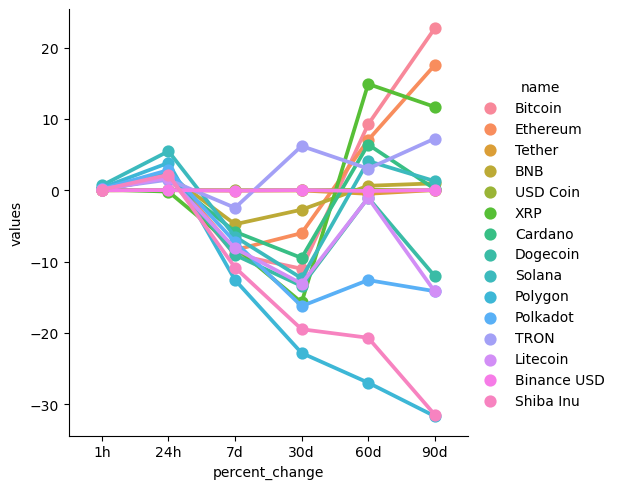

In [50]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [76]:
df11=df[['name','quote.USD.price']]
df11

,name,quote.USD.price
0,Bitcoin,26813.682811
1,Ethereum,1805.460249
2,Tether,1.000503
3,BNB,310.527272
4,USD Coin,1.000065
5,XRP,0.427961
6,Cardano,0.368533
7,Dogecoin,0.072098
8,Solana,21.231441
9,Polygon,0.863808


<Axes: xlabel='quote.USD.price', ylabel='name'>

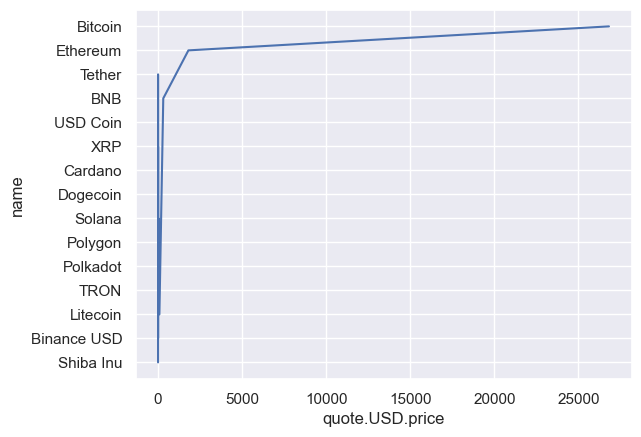

In [77]:
sns.set_theme(style='darkgrid')
sns.lineplot(y='name',x='quote.USD.price',data=df11)